In [1]:
using IonSim
using QuantumOptics

import PyPlot
const plt = PyPlot

PyPlot

In [2]:
# set some plot configs
plt.matplotlib.rc("xtick", top=false)
plt.matplotlib.rc("ytick", right=false, left=false)
plt.matplotlib.rc("axes", labelsize=10, titlesize=20, grid=true)
plt.matplotlib.rc("axes", linewidth=1)
plt.matplotlib.rc("grid", alpha=0.25, linestyle="--")
plt.matplotlib.rc("font", family="Palatino", weight="medium")
plt.matplotlib.rc("figure", figsize=(5.75,4))
plt.matplotlib.rc("xtick.major", width=1)
plt.matplotlib.rc("ytick.major", width=1)

┌ Warning: !(ϵ ⟂ k)
└ @ IonSim /Users/josephbroz/Desktop/IonSim/IonSim.jl/src/lasers.jl:84


In [3]:
# We'll linearly sweep through the laser's frequency from -125 kHz to +125 kHz (detuned from the carrier transition)
# in a time Tp

Tp = 250 # the length of time of the frequency chirp in μs
Δϕ = Tp * 1e-3  # this is equal to half the detuning range we will chirp the laser over multiplied by the timescale (1e-6)
L.ϕ = t -> 2π * (-Δϕ/2 + (Δϕ / Tp) * t) * t

# tr = 33
# function Ω(t)
#     if t < tr
#         return E * sin(2π * t / 4tr)^2
#     elseif tr <= t <= 150 - tr
#         return E
#     elseif 150 - tr < t < 150
#         return E * sin(2π * (t - 150) / 4tr)^2
#     else
#         return 0
#     end
# end

# function Ω2(t)
#     T = Tp
#     σ = T / (2*√2)
#     E * exp(-(t - T/2)^2 / 2σ^2) 
# end

function Ω3(t)
    T = Tp
    E * sin(π * t/Tp)^2
end

L.E = Ω3;

UndefVarError: UndefVarError: L not defined

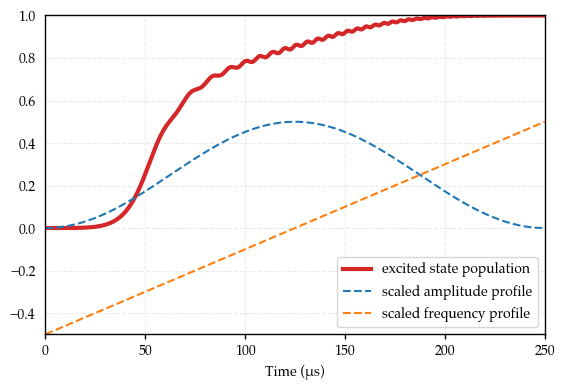

In [629]:
h = hamiltonian(T, rwa_cutoff=Inf, lamb_dicke_order=1)
tout, sol = timeevolution.schroedinger_dynamic(0:.1:Tp, C["S-1/2"] ⊗ mode[0], h)

plt.plot(tout, expect(ionprojector(T, "D-1/2"), sol), lw=3, color="C3", label="excited state population")
plt.plot(tout, @.(L.E(tout) / 2E), ls="--", label="scaled amplitude profile")
plt.plot(tout, @.(L.ϕ(tout) / (2π * Δϕ * tout)), ls="--", label="scaled frequency profile")
plt.xlim(tout[1], tout[end])
plt.legend(loc=4)
plt.ylim(-0.5, 1)
plt.xlabel("Time (μs)")
plt.tight_layout()
plt.savefig("/Users/josephbroz/Desktop/rap.png")